<a href="https://colab.research.google.com/github/alizul01/2141720088-PCVK-2023/blob/main/09_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pytesseract
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize, thin
from skimage.util import invert

## Method

In [20]:
def load_image(file_path):
    img = cv2.imread(file_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def compare_images(original, processed, title_before='Original', title_after='Processed', cmap=None):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap=cmap)
    plt.title(title_before)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap=cmap)
    plt.title(title_after)
    plt.axis('off')

    plt.show()

def apply_morphological_operation(img, kernel, operation='dilate'):
    height, width, _ = img.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2
    result = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(pad_height, height - pad_height):
        for j in range(pad_width, width - pad_width):
            kernel_area = img[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            for channel in range(3):
                if operation == 'dilate':
                    result[i, j, channel] = np.max(kernel_area[:, :, channel] * kernel)
                elif operation == 'erode':
                    result[i, j, channel] = np.min(kernel_area[:, :, channel] * kernel)

    return result

def erode(img, kernel):
    return apply_morphological_operation(img, kernel, operation='erode')

def dilate(img, kernel):
    return apply_morphological_operation(img, kernel, operation='dilate')

## Kernel Area

In [3]:
se_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
se_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
se_3x5 = np.ones((3, 5), np.uint8)
se_5x7 = np.ones((5, 7), np.uint8)
se_square_5x5 = np.ones((5, 5), np.uint8)
se_square_3x3 = np.ones((3, 3), np.uint8)
se_5x5_circular = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)
se_vertical_3 = np.ones((3, 1), np.uint8)
se_vertical_5 = np.ones((5, 1), np.uint8)

## License Plate

### Self Methodology

In [4]:
img_license = load_image('plat nomer.jpg')
img_license_dilated = dilate(img_license, se_3x3)

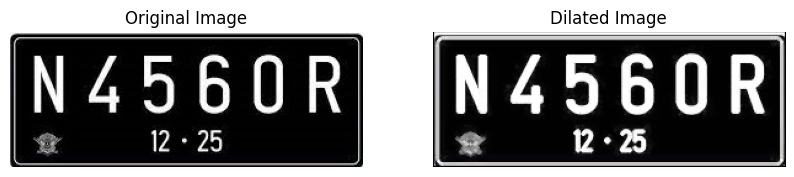

In [5]:
compare_images(img_license, img_license_dilated, 'Original Image', 'Dilated Image')

### CV Dilatation Methodology

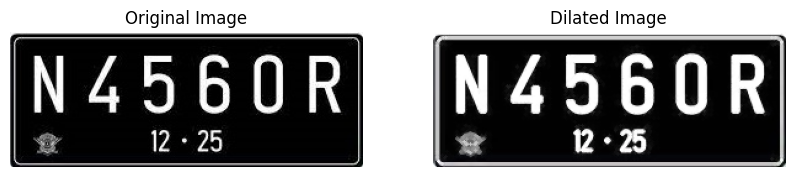

In [6]:
img_license_dilated = cv2.dilate(img_license, se_3x3, iterations=1)
compare_images(img_license, img_license_dilated, 'Original Image', 'Dilated Image')

### Erotion

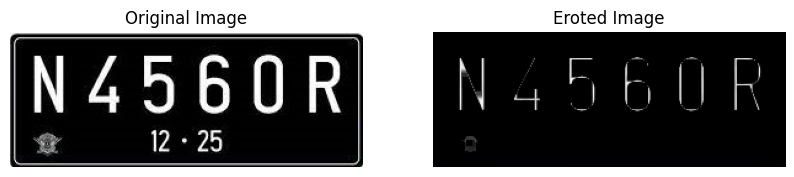

In [7]:
img_license_erotion = erode(img_license, se_square_5x5)
compare_images(img_license, img_license_erotion, 'Original Image', 'Eroted Image')

### Erode with CV Lib

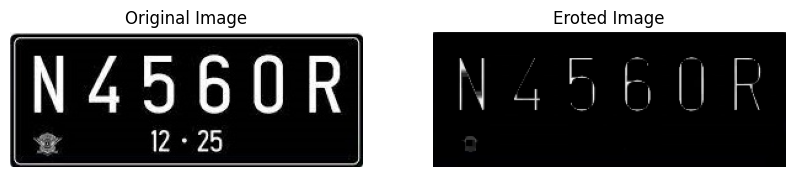

In [8]:
img_license_erotion = cv2.erode(img_license, se_square_5x5 , iterations=1)
compare_images(img_license, img_license_erotion, 'Original Image', 'Eroted Image')

### Opening SE Squre 3x3

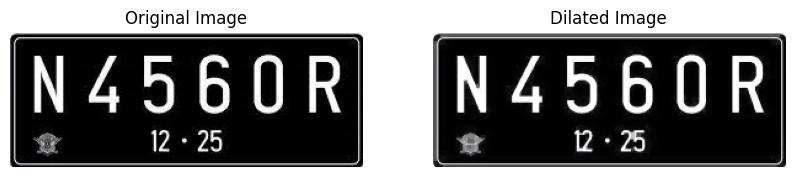

In [9]:
dilated_image = cv2.dilate(img_license, se_square_3x3, iterations=1)
eroded_image = cv2.erode(dilated_image, se_square_3x3, iterations=1)

compare_images(img_license, eroded_image, 'Original Image', 'Dilated Image')

### Usin' CV Lib

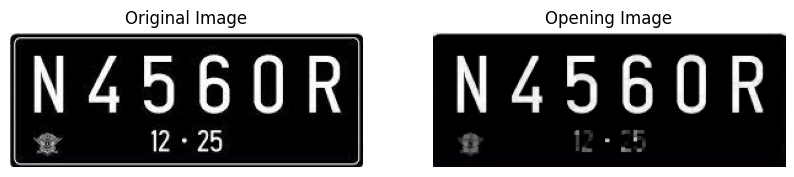

In [10]:
img_license_erotion = cv2.morphologyEx(img_license, cv2.MORPH_OPEN, se_square_3x3)

compare_images(img_license, img_license_erotion, 'Original Image', 'Opening Image')

## Closing

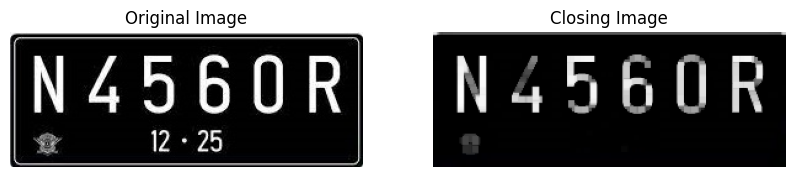

In [11]:
eroded_image = cv2.erode(img_license, se_square_5x5, iterations=1)
dilated_image = cv2.dilate(eroded_image, se_square_5x5, iterations=1)


compare_images(img_license, dilated_image, 'Original Image', 'Closing Image')


### Dilated Image 3x3 and 5x5

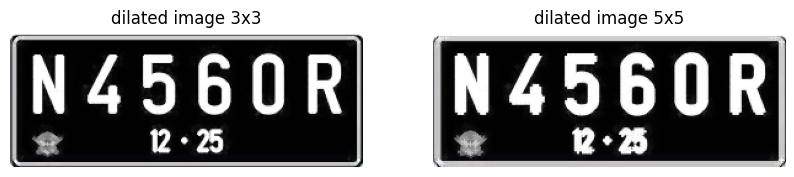

In [12]:
dilated_image_3x3 = cv2.dilate(img_license, se_3x3, iterations=1)
dilated_image_5x5 = cv2.dilate(img_license, se_5x5, iterations=1)

compare_images(dilated_image_3x3, dilated_image_5x5, 'dilated image 3x3', 'dilated image 5x5')

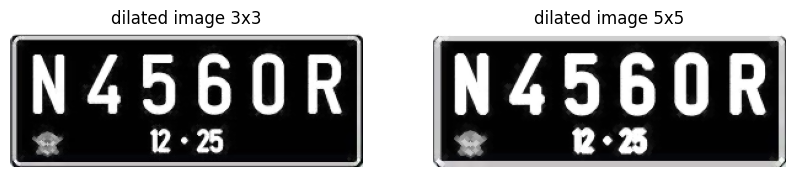

In [13]:
dilated_image_3x3 = cv2.dilate(img_license, se_3x3, iterations=1)
dilated_image_5x5 = cv2.dilate(img_license, se_5x5_circular, iterations=1)

compare_images(dilated_image_3x3, dilated_image_5x5, 'dilated image 3x3', 'dilated image 5x5')

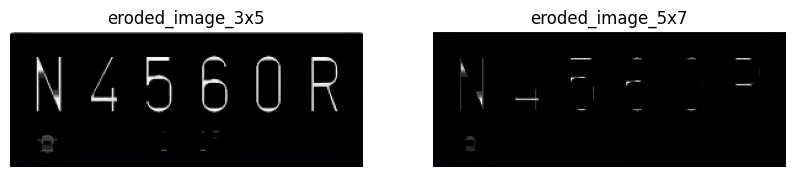

In [14]:
eroded_image_3x5 = cv2.erode(img_license, se_3x5, iterations=1)
eroded_image_5x7 = cv2.erode(img_license, se_5x7, iterations=1)

compare_images(eroded_image_3x5, eroded_image_5x7, 'eroded_image_3x5', 'eroded_image_5x7')

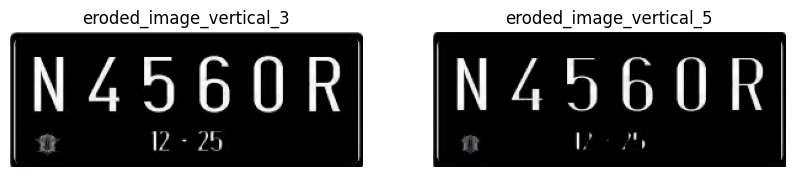

In [15]:
eroded_image_vertical_3 = cv2.erode(img_license, se_vertical_3, iterations=1)
eroded_image_vertical_5 = cv2.erode(img_license, se_vertical_5, iterations=1)

compare_images(eroded_image_vertical_3, eroded_image_vertical_5, 'eroded_image_vertical_3', 'eroded_image_vertical_5')

## Kitten

### Top Hat

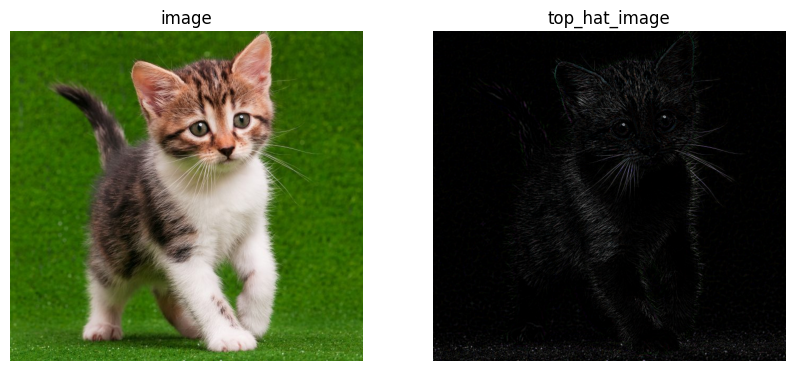

In [16]:
image = load_image('kitten01.jpg')
opening_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se_square_5x5)
top_hat_image = cv2.absdiff(image, opening_image)


compare_images(image, top_hat_image, 'image', 'top_hat_image')

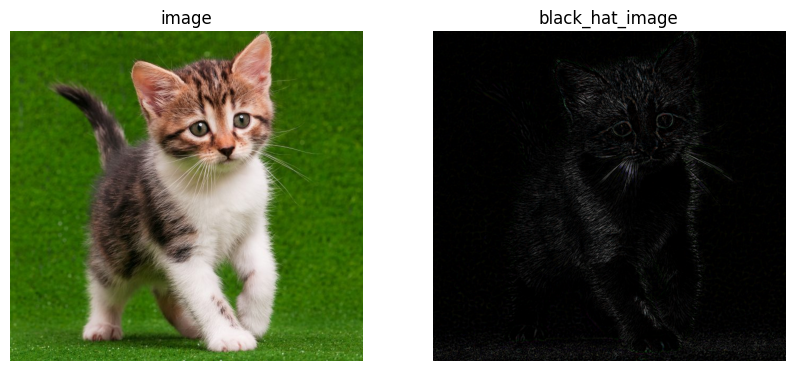

In [17]:
closing_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se_square_5x5)
black_hat_image  = cv2.absdiff(image, closing_image)

compare_images(image, black_hat_image, 'image', 'black_hat_image')

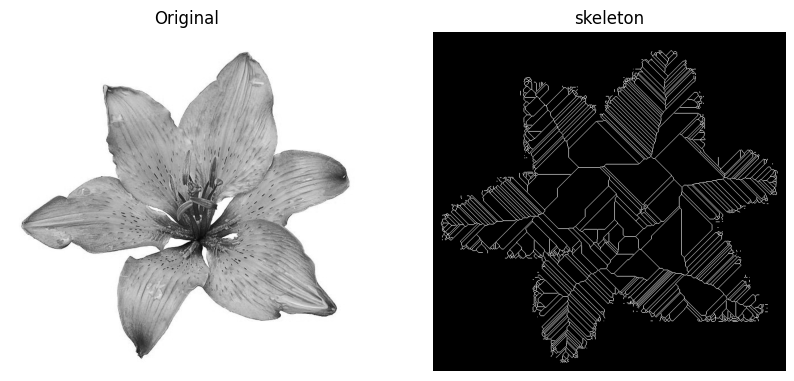

In [21]:
image = load_image('lily.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_inverted = invert(image)
image_skeleton = skeletonize(image_inverted, method='lee')

compare_images(image, image_skeleton, title_after='skeleton', cmap='gray')

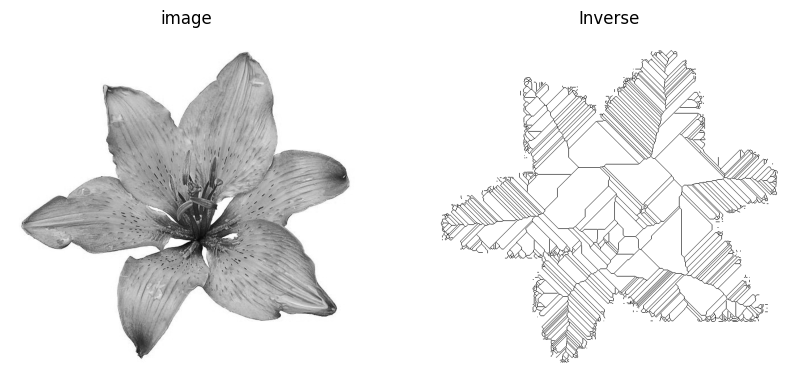

In [22]:
inverse_skeleton_image = cv2.bitwise_not(image_skeleton)
compare_images(image, inverse_skeleton_image, 'image', 'Inverse', cmap='gray')

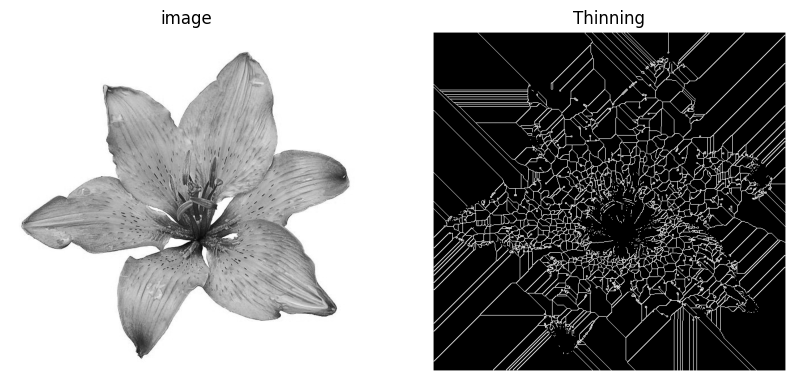

In [77]:
image_thin = cv2.ximgproc.thinning(image)
compare_images(image, image_thin, 'image', 'Thinning', cmap='gray')

## KTP

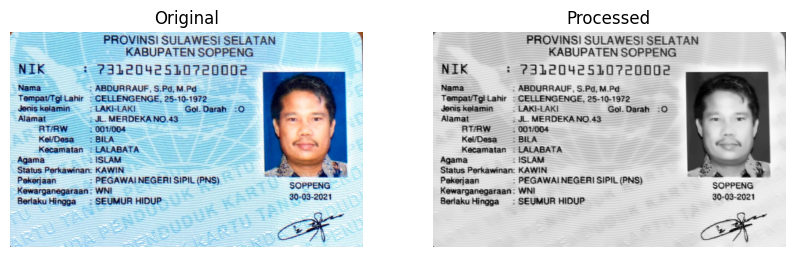

In [24]:
ktp_image = load_image('ktp.jpeg')
ktp_denoised = cv2.fastNlMeansDenoisingColored(ktp_image, None, h=7)
ktp_image_gray = cv2.cvtColor(ktp_denoised, cv2.COLOR_RGB2GRAY)
compare_images(ktp_image, ktp_image_gray, cmap='gray')

### Preprocessing

In [55]:
ret, threshed = cv2.threshold(ktp_image_gray, 127, 255, cv2.THRESH_TRUNC)

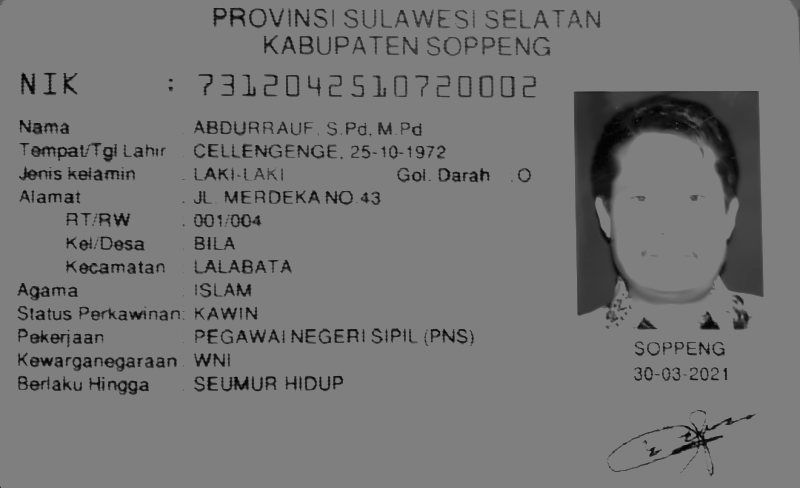

In [56]:
cv2_imshow(threshed)

In [61]:
ktp_image_gray = cv2.dilate(ktp_image_gray, se_3x3)

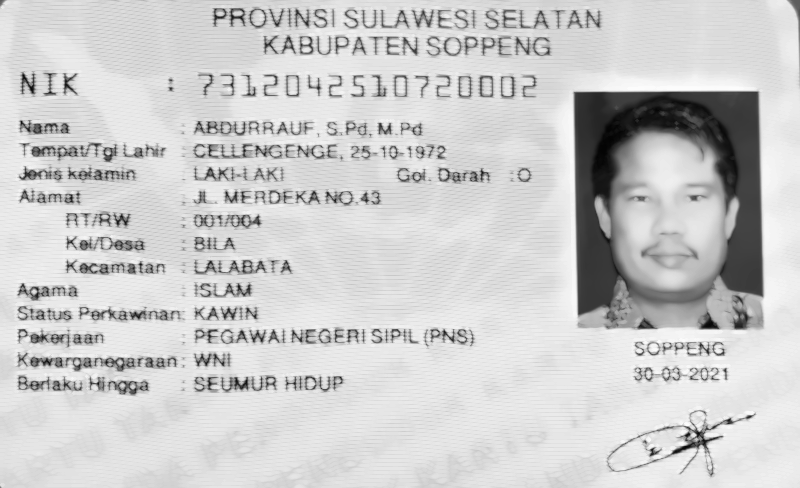

In [62]:
cv2_imshow(ktp_image_gray)

In [63]:
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")

In [64]:
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [65]:
from pytesseract import Output

img = cv2.imread('ktp.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [66]:
print(text2)

PROVINSI SULAWESI SELATAN

KABUPATEN SOPPENG
NIK : ?312042510720002
Nama ABDURRAUF. S.Pd, MPd
Tempat/TgiLahir CELLENGENGE. 25-10-1972
Jenis kelamin LAKI-LAKI Gol. Darah .O
Alamat JL. MERDEKA NO.43
RTRW . 001/004

Kel/Desa BILA
Kecamatan  LALABATA

 

Agama ISLAM
Status Perkawinan: KAWIN -
Pekerjaan PEGAWAI NEGERI SIPIL (PNS) SOPPENG
Kewarganegaraan WNI

30-03-2021

Berlaku Hingga SEUMUR HIDUP



In [69]:
n_boxes = len(text1['text'])

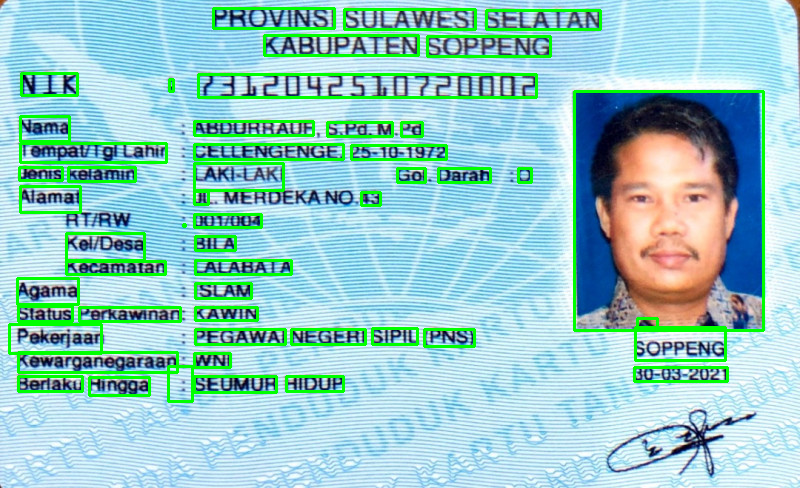

In [76]:
for i in range(n_boxes):
    if int(text1['conf'][i]) > 20:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)